2. data2 是关于重伤病人的一些基本资料。自变量X是病人的住院天数，因变量Y是病人出院后长期恢复的预后指数，指数数值越大表示预后结局越好。

尝试对数据拟合合适的线性或非线性模型

In [1]:
import numpy as np
import pandas as pd
import sys
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [10]:
data = pd.read_table('data2.txt',encoding='gb2312')
x = data['X'].reshape(-1, 1)
y = data['Y'].reshape(-1, 1)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [11]:
data

,序号,X,Y
0,1,2,54
1,2,5,50
2,3,7,45
3,4,10,37
4,5,14,35
5,6,19,25
6,7,26,20
7,8,31,16
8,9,34,18
9,10,38,13


In [12]:
x

array([[ 2],
       [ 5],
       [ 7],
       [10],
       [14],
       [19],
       [26],
       [31],
       [34],
       [38],
       [45],
       [52],
       [53],
       [60],
       [65]], dtype=int64)

In [13]:
y

array([[54],
       [50],
       [45],
       [37],
       [35],
       [25],
       [20],
       [16],
       [18],
       [13],
       [ 8],
       [11],
       [ 8],
       [ 4],
       [ 6]], dtype=int64)

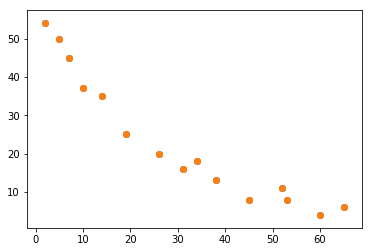

In [8]:
#x,y的散点图
plt.scatter(x,y)
plt.show()

直线

In [14]:
#x,y拟合直线 线性回归模型
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print('coefficients:\n',linreg.coef_)

coefficients:
 [[-0.752508]]


In [20]:
from sklearn.metrics import mean_squared_error as mse

In [21]:
y_pred = linreg.predict(x)

In [22]:
print('MSE:\n',mse(y,y_pred))

MSE:
 30.0796361959


多项式

本次数据中只有一个变量，sklearn中无多项式回归

对数回归

In [23]:
x2 = pd.DataFrame(np.log(x))

In [24]:
from sklearn.linear_model import LinearRegression
linreg2 = LinearRegression()
lr2 = linreg2.fit(x2,y)

In [25]:
y2_pred = linreg2.predict(x2)

In [27]:
print('MSE:\n',mse(y,y2_pred))

MSE:
 9.10235862891


In [28]:
print('coefficients:\n',linreg2.coef_)

coefficients:
 [[-15.96615346]]


指数

In [29]:
y3 = pd.DataFrame(np.log(y))

In [30]:
linreg3 = LinearRegression()

In [31]:
linreg3 = linreg3.fit(pd.DataFrame(x),y3)

In [32]:
y3_pred = linreg3.predict(pd.DataFrame(x))

In [33]:
print('MSE:\n',mse(y,y3_pred))

MSE:
 658.729520518


In [34]:
print('coefficients:\n',linreg3.coef_)

coefficients:
 [[-0.03797418]]


幂函数

In [36]:
linreg4 = LinearRegression()

In [37]:
linreg4.fit(x2,y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
y4_pred = linreg4.predict(x2)

In [39]:
print('MSE:\n',mse(y3,y4_pred))

MSE:
 0.105937789454


In [40]:
print('coefficients:\n',linreg3.coef_)

coefficients:
 [[-0.03797418]]


综上，幂函数效果最好